# Data Source & Import Data from S3 Bucket to Sagemaker

In [18]:
# the data was downloaded to my S3 bucket and then imported to Sagemaker. The data represents the geographic distribution worldwide of COVID-19 up to 28 April 2020.

In [40]:
# This data shows the day, month, year, country, and the number of cases and deaths related to COVID-19. Additional data includes the population data of 2018 for each respective country and the continents that the countries are apart of.

In [19]:
%matplotlib inline

In [20]:
import pandas

In [21]:
df = pandas.read_excel('s3://kaloudsx-ia241/COVID-19-geographic-disbtribution-worldwide-2020-04-28.xlsx')
df[:30]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-28,28,4,2020,172,0,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-04-27,27,4,2020,68,10,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-04-26,26,4,2020,112,4,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-04-25,25,4,2020,70,1,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-04-24,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-04-23,23,4,2020,84,4,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-04-22,22,4,2020,61,1,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-04-21,21,4,2020,35,2,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-04-20,20,4,2020,88,3,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-04-19,19,4,2020,63,0,Afghanistan,AF,AFG,37172386.0,Asia


In [22]:
# I wanted to see the first 30 rows of the data. I decided on 30 because that is approximately a month and when assessing the virus it is typically viewed over the months that it has been active.

# The Sum of Deaths per day

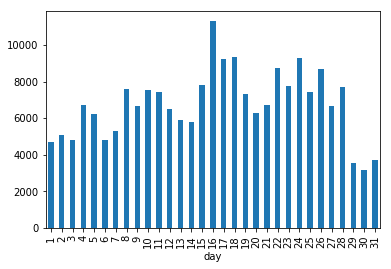

In [23]:
sum_deaths_by_day = df.groupby('day').sum()['deaths']

sum_deaths_by_day.plot.bar()

In [24]:
# In this question I wanted to visualize the sum of deaths per day. From this visualization we see that there is a spike in the middle of the month, (day 16).

# Data in Greece

In [25]:
greece_data = df.loc[df['countriesAndTerritories'] == 'Greece']

greece_data[:30]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
5055,2020-04-28,28,4,2020,28,6,Greece,EL,GRC,10727668.0,Europe
5056,2020-04-27,27,4,2020,0,0,Greece,EL,GRC,10727668.0,Europe
5057,2020-04-26,26,4,2020,16,0,Greece,EL,GRC,10727668.0,Europe
5058,2020-04-25,25,4,2020,27,5,Greece,EL,GRC,10727668.0,Europe
5059,2020-04-24,24,4,2020,55,4,Greece,EL,GRC,10727668.0,Europe
5060,2020-04-23,23,4,2020,7,0,Greece,EL,GRC,10727668.0,Europe
5061,2020-04-22,22,4,2020,156,5,Greece,EL,GRC,10727668.0,Europe
5062,2020-04-21,21,4,2020,10,6,Greece,EL,GRC,10727668.0,Europe
5063,2020-04-20,20,4,2020,28,5,Greece,EL,GRC,10727668.0,Europe
5064,2020-04-19,19,4,2020,0,0,Greece,EL,GRC,10727668.0,Europe


In [26]:
# I then looked at COVID-19 data from Greece. Again I decided to look at the first 30 rows. 

# Number of Deaths in Greece per day

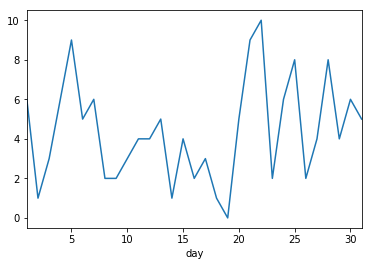

In [27]:
greece_data = df.loc[df['countriesAndTerritories'] == 'Greece'].groupby('day').sum()['deaths']

greece_data.plot()

In [28]:
# I decided to visualize the number of deaths in Greece per day using a line chart. Over the 30 days we see that the deaths are relatively low when compared to the data in question 1. (Look at the significant difference on each of the Y axis). The spike of deaths is around day 22.

# Number of Cases in Greece per day

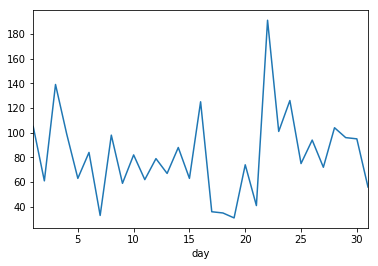

In [29]:
greece_data = df.loc[df['countriesAndTerritories'] == 'Greece'].groupby('day').sum()['cases']

greece_data.plot()

In [30]:
# the number of cases in Greece per day is also visualized through a line graph. There is a dip in cases between days 15 and 20 but there is a sharp increase in cases between days 20 and 25. 

# Number of Cases in relation to Number of Deaths in Greece 

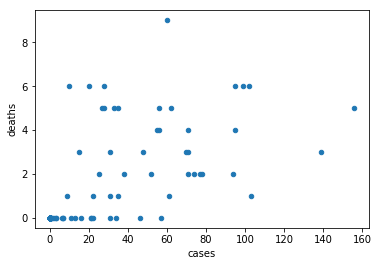

In [31]:
greece_data = df.loc[df['countriesAndTerritories'] == 'Greece']

greece_data.plot.scatter(x='cases',y='deaths')

In [32]:
# this visualization shows the number of cases in relation to the number of deaths in Greece. Again we see relative low numbers of death. Intrestingly more deaths occured when there were fewer cases.

# 5.1 / 5.2

In [35]:
# the data imported is COVID-19 data up to 28 April 2020 and it's geographic disbtribution worldwide. The table I produced visualized the top 30 rows

# 5.3

In [36]:
# i had a few calculation including:
# 1) the sum of deaths per day.
# 2) the top 30 rows of data from Greece
# 3) the number of deaths in Greece per day
# 4) the number of cases in Greece per day
# 5) the number of cases in relation to the number of deaths in Greece

# 5.4

In [37]:
# 1) this shows the top 30 rows of the entire data set
# 2) this show the top 30 rows of the data from Greece only
# 3) the number of deaths per day was low 
# 4) the number of cases increased around the 20th and 25th of the month.
# 5) there is a high numbre of cases however the death toll still is relativly low

# 5.6

In [38]:
# limitations of this project is working with data up to 28 April 2020. I think that suggestions for improving my projects is having updated data.

In [39]:
# another limitation is my abilities in python and code in general. I am a beginner and I think with more experience I can provide better analysis.